### 2D visualization of coil-20 images   

#### Import libraries  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

#### Parameters  

In [6]:
csv_in = 'fashion-mnist_test1000.csv'
n_components = 2
n_neighbors = 30
n_obj = 10

#### Read CSV file  

In [7]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 6.0 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Separate data  

In [8]:
df_X = df.iloc[:,:-1]
obj = df['label']
display(df_X.head())
print(obj.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,9,8,...,125,103,87,56,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,216,34,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,0,63,53,31,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,137,126,140,0,133,224,222,56,0
4,3,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64


#### Standardization  

In [9]:
sc = StandardScaler()
X = sc.fit_transform(df_X) 

#### Manifold learning  

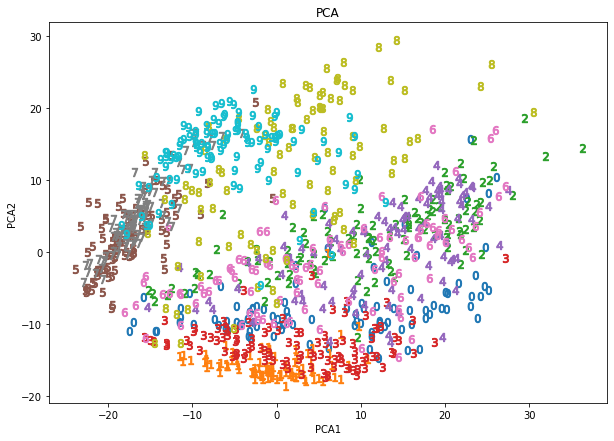

In [10]:
# PCA
Y = PCA(n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("PCA")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

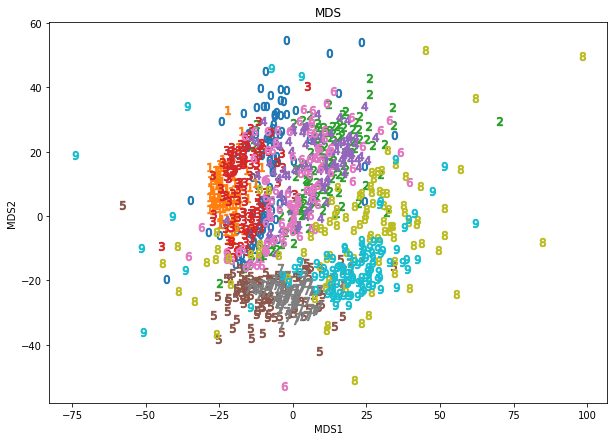

In [11]:
# MDS
Y = MDS(n_components=n_components, random_state=17).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("MDS")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()

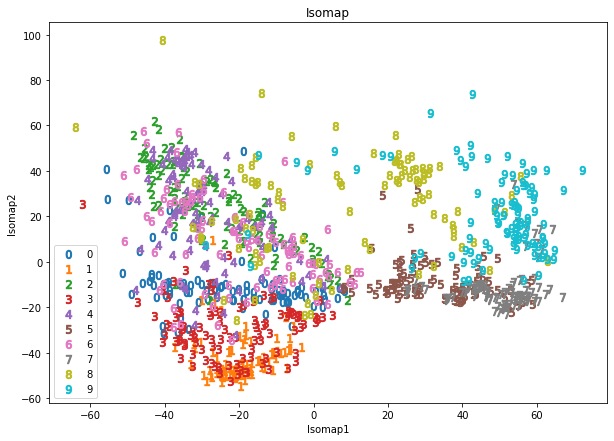

In [12]:
# Isomap
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("Isomap")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()
plt.show()

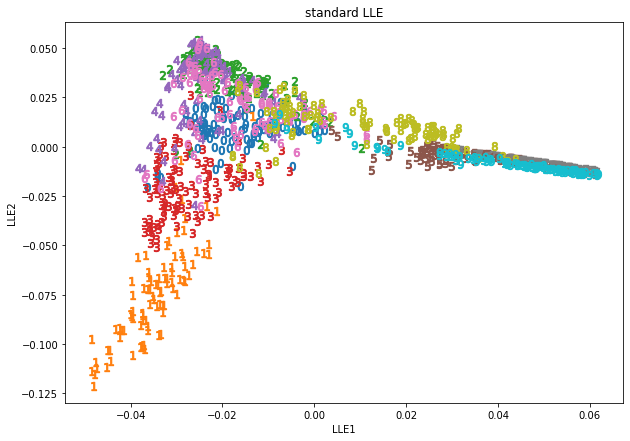

In [13]:
# LLE
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.show()

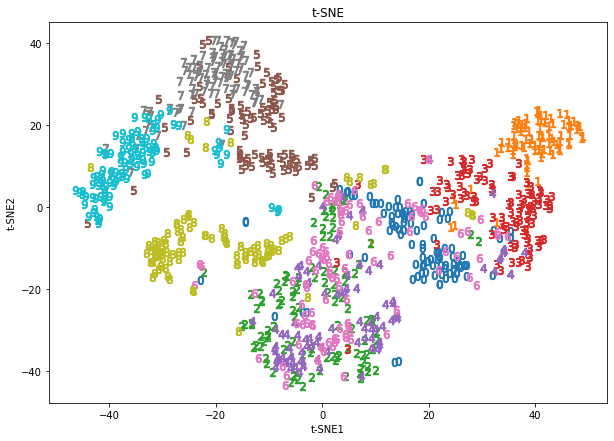

In [14]:
# t-SNE
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=17).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()